In [3]:
from data_load import *
from dfTest import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
price = pd.DataFrame(data["Adj Close"])
price.columns = ['Adj Close']
price['20d'] = np.round(price['Adj Close'].rolling(20).mean(),2)
price['40d'] = np.round(price['Adj Close'].rolling(40).mean(),2)

price.head()

,Adj Close,20d,40d
0,68.306000,NaN,NaN
1,69.627998,NaN,NaN
2,71.001999,NaN,NaN
3,71.066002,NaN,NaN
4,71.375999,NaN,NaN


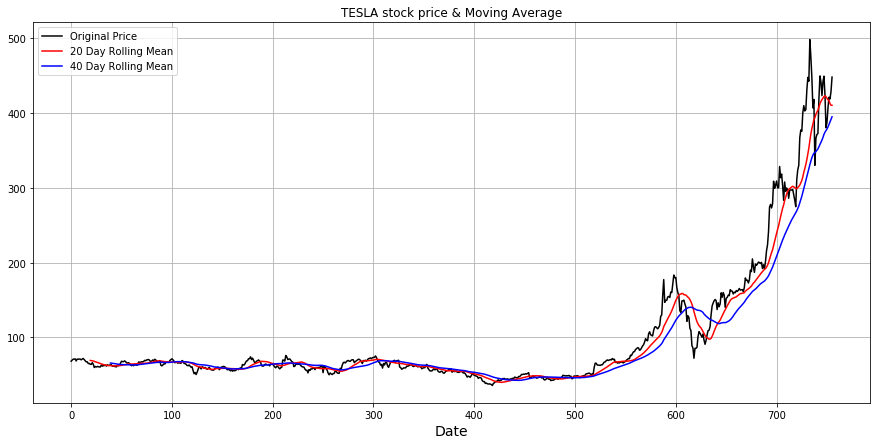

In [5]:
fig, ax = plt.subplots(figsize=(15,7))

ax.plot(price['Adj Close'], color='black',label='Original Price')
ax.plot(price['20d'], color='red',label='20 Day Rolling Mean')
ax.plot(price['40d'], color='blue',label='40 Day Rolling Mean')
ax.legend(loc='best')

plt.xlabel("Date", fontsize=14)
plt.grid(True)
plt.title("TESLA stock price & Moving Average")
plt.show()

## Rolling Mean Subtracted

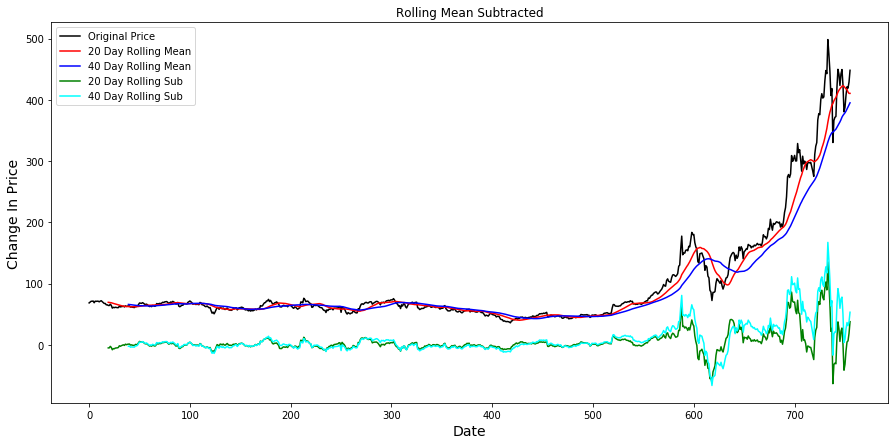

In [6]:
price['20d Sub'] = price['Adj Close'] - price['20d']
price['40d Sub'] = price['Adj Close'] - price['40d']

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(price['Adj Close'], color='black',label='Original Price')
ax.plot(price['20d'], color='red',label='20 Day Rolling Mean')
ax.plot(price['40d'], color='blue',label='40 Day Rolling Mean')
ax.plot(price['20d Sub'], color='green',label='20 Day Rolling Sub')
ax.plot(price['40d Sub'], color='cyan',label='40 Day Rolling Sub')


plt.xlabel("Date", fontsize=14)
plt.ylabel("Change In Price", fontsize=14)
plt.title('Rolling Mean Subtracted')
ax.legend(loc='best')
plt.show()

In [7]:
print("20 days moving average substracted dickey-fuller test")
print()
dfTest(price['20d Sub'].dropna())

20 days moving average substracted dickey-fuller test

ADF Statistic: -4.12061296807817
p-value: 0.0008952688246448366
Critical Values:
1%: -3.439477677285233
5%: -2.865568186630048
10%: -2.5689150720653977


##### Reject the null hypothesis (H0) and the data is stationary.

In [8]:
print("40 days moving average substracted dickey-fuller test")
print()
dfTest(price['40d Sub'].dropna())

40 days moving average substracted dickey-fuller test

ADF Statistic: -2.744778525678242
p-value: 0.06660494191268633
Critical Values:
1%: -3.4397263458688045
5%: -2.8656777575510204
10%: -2.5689734469387755


##### Fail to reject the null hypothesis (H0), which is non-stationary and has some time dependent structure.

## Exponentially Weighted Rolling Mean Subtracted

In [9]:
price['Weigted 20d'] = price['Adj Close'].ewm(span = 20).mean()
price['Weigted 40d'] = price['Adj Close'].ewm(span = 40).mean()


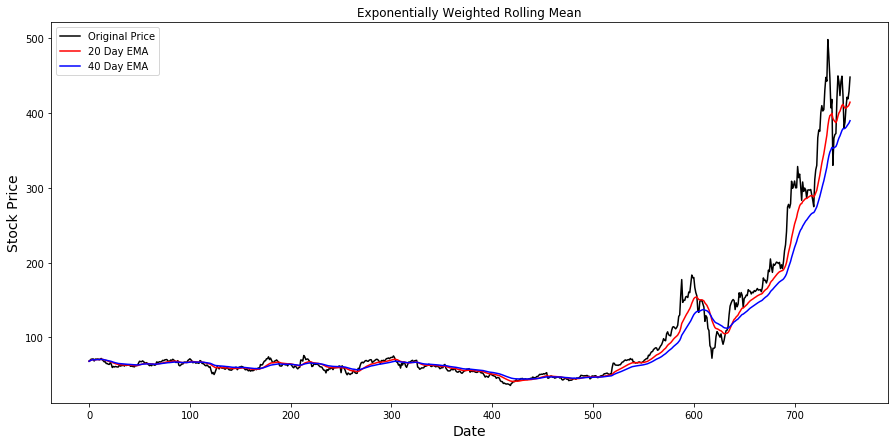

In [10]:
fig, ax = plt.subplots(figsize=(15,7))

ax.plot(price['Adj Close'], color='black',label='Original Price')
ax.plot(price['Weigted 20d'], color='red',label='20 Day EMA')
ax.plot(price['Weigted 40d'], color='blue',label='40 Day EMA')

plt.xlabel("Date", fontsize=14)
plt.ylabel("Stock Price", fontsize=14)
plt.title('Exponentially Weighted Rolling Mean')

ax.legend(loc='best')

In [11]:
price['20d ewm Sub'] = price['Adj Close'] - price['Weigted 20d']
price['40d ewm Sub'] = price['Adj Close'] - price['Weigted 40d']

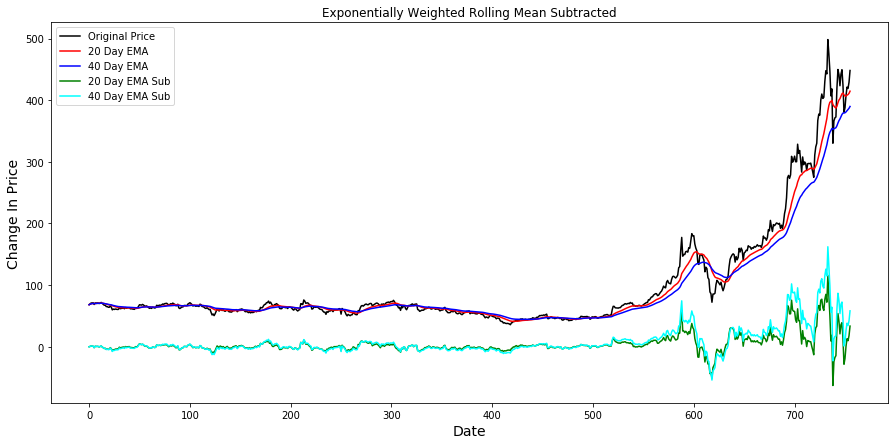

In [12]:
fig, ax = plt.subplots(figsize=(15,7))

ax.plot(price['Adj Close'], color='black',label='Original Price')
ax.plot(price['Weigted 20d'], color='red',label='20 Day EMA')
ax.plot(price['Weigted 40d'], color='blue',label='40 Day EMA')
ax.plot(price['20d ewm Sub'], color='green',label='20 Day EMA Sub')
ax.plot(price['40d ewm Sub'], color='cyan',label='40 Day EMA Sub')

plt.xlabel("Date", fontsize=14)
plt.ylabel("Change In Price", fontsize=14)
plt.title('Exponentially Weighted Rolling Mean Subtracted')

ax.legend(loc='best')

In [13]:
print("20 days EMA substracted dickey-fuller test")
print()
dfTest(price['20d ewm Sub'].dropna())

20 days EMA substracted dickey-fuller test

ADF Statistic: -3.662425305011227
p-value: 0.004673814913189306
Critical Values:
1%: -3.4392418578608983
5%: -2.86546426916434
10%: -2.568859710342903


##### Reject the null hypothesis (H0) and the data is stationary.

In [14]:
print("40 days EMA substracted dickey-fuller test")
print()
dfTest(price['40d ewm Sub'].dropna())

40 days EMA substracted dickey-fuller test

ADF Statistic: -2.3437758349258715
p-value: 0.1582376822151766
Critical Values:
1%: -3.4392418578608983
5%: -2.86546426916434
10%: -2.568859710342903


##### Fail to reject the null hypothesis (H0), which is non-stationary and has some time dependent structure.